# Part I - PISA2012 Data Analysis
## by Dingdong Li

## Introduction

The dataset that I analysed is the OECD’s Programme for International Student Assessment 2012 survey dataset (PISA2012). The survey assessed the 15-year-old students' skills and knowledge in mathematics, science and reading. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy. 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# The columns used for analysis 
cols_list = ['CNT','SCHOOLID', 'STIDSTD','ST04Q01','IMMIG','FAMSTRUC','BFMJ2', 'BMMJ1','HISEI', 'FISCED','MISCED','HISCED',
             'OUTHOURS','PARED','PV1MATH','PV1READ', 'PV1SCIE']

In [3]:
df_student = pd.read_csv("pisa2012.txt", encoding= 'unicode_escape', usecols = cols_list)

In [4]:
pd.set_option('display.max_columns', None)
df_student.sample(5)

,CNT,SCHOOLID,STIDSTD,ST04Q01,BFMJ2,BMMJ1,FAMSTRUC,FISCED,HISCED,HISEI,IMMIG,MISCED,OUTHOURS,PARED,PV1MATH,PV1READ,PV1SCIE
242926,Italy,95,2337,Female,15.35,NaN,2.0,ISCED 2,ISCED 2,15.35,Native,ISCED 2,4.0,8.0,442.2885,446.5651,501.8090
102414,Switzerland,241,6401,Male,75.13,56.00,2.0,"ISCED 5A, 6","ISCED 5A, 6",75.13,Native,ISCED 5B,NaN,17.5,606.2549,549.3141,541.2533
311740,Macao-China,14,1373,Female,35.34,35.34,2.0,ISCED 2,ISCED 2,35.34,Second-Generation,ISCED 2,18.0,9.0,499.4625,535.5278,515.2369
96578,Switzerland,24,565,Female,35.66,64.44,2.0,ISCED 5B,"ISCED 5A, 6",64.44,Native,"ISCED 5A, 6",2.0,17.5,586.7035,581.5978,579.7650
117623,Colombia,139,3525,Male,58.77,58.77,NaN,ISCED 2,ISCED 2,58.77,Native,ISCED 2,NaN,9.0,300.7556,335.9165,399.7949


In [5]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNT       485490 non-null  object 
 1   SCHOOLID  485490 non-null  int64  
 2   STIDSTD   485490 non-null  int64  
 3   ST04Q01   485490 non-null  object 
 4   BFMJ2     416150 non-null  float64
 5   BMMJ1     364814 non-null  float64
 6   FAMSTRUC  429058 non-null  float64
 7   FISCED    452903 non-null  object 
 8   HISCED    473091 non-null  object 
 9   HISEI     450621 non-null  float64
 10  IMMIG     471793 non-null  object 
 11  MISCED    467085 non-null  object 
 12  OUTHOURS  308799 non-null  float64
 13  PARED     473091 non-null  float64
 14  PV1MATH   485490 non-null  float64
 15  PV1READ   485490 non-null  float64
 16  PV1SCIE   485490 non-null  float64
dtypes: float64(9), int64(2), object(6)
memory usage: 63.0+ MB


### What is the structure of your dataset?

The original PISA2012 dataset has 485,490 rows and 636 columns. The datatypes of columns are float (250 columns), integer (18 columns) and object (368 columns). The metadata are provided by the pisa2012disc.txt. The columns includes the students basic information, like the country, which school they attend, gender, age and so forth, their answers to the questionairs, the integrated results of different measures infered from the answers of the questionairs (for example, Disciplinary climate (DISCLIMA) is based on all five items in ST81), five plausible values of the student performance in the mathematica, science and reading, weights and dataentry date.
### What is/are the main feature(s) of interest in your dataset?

I am mainly interested in how the immigration status and family environment contribute to the students' math, reading and science performance in the United States. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that support my investigation include:

- CNT:	Country code 3-character
- SCHOOLID:	School ID 7-digit (region ID + stratum ID + 3-digit school ID)
- STIDSTD:	Student ID
- ST04Q01:	Gender
- IMMIG: immigrant background
- FAMSTRUC:	Family Structure
- BFMJ2: father’s occupational status
- BMMJ1: mother’s occupational status
- HISEI: the highest occupational status of parents 
- FISCED: educational level of father 
- MISCED: educational level of mother 
- HISCED: highest educational level of parents
- PARED:  Highest parental education in years
- OUTHOURS:	Out-of-School Study Time
- PV1MATH:	Plausible value 1 in mathematics
- PV1READ:	Plausible value 1 in reading
- PV1SCIE:	Plausible value 1 in science


**Note**: 
1. There are about one-third of the attitudinal and other non-cognitive constructs are missing in the dataset because the PISA use rotated questionairs to cover more topics, as the PISA 2012 technical report states:
> "The rotated design was such that three forms of the questionnaire contained a common part and a rotated part. The
common part, which was administered to all students, contained questions to obtain information about gender, language
at home, migrant background, home possessions, parental occupation and education. The rotated part which was
administered to one-third of students contained questions about attitudinal and other non-cognitive constructs." (*PISA 2012 Technical Report*, OEDC 2014)
2. Some of items, the values are straightforward (for example, gender). However, most questionnaire items were designed to be combined in some way in order to measure latent constructs that cannot be observed directly. To these items, transformations or scaling procedures were applied to construct meaningful indices. The scaling procedures are listed in the *PISA 2012 Technical Report* (OEDC 2014)
  - `Family structure (FAMSTRUC)`: “1” if “single parent family” (students living with only one of the following: mother, father, male guardian, female guardian), “2” if “two parent family” (students living with a father or step/foster father and a mother or step/foster mother) and “3” for students who do not live with their parents.
 - `Occupational status of parents (BFMJ2/BFMJ1/HISEI)`: Occupational data for both the student’s father and student’s mother were obtained by asking open-ended questions. The responses were coded to four-digit ISCO codes (ILO, 2007) and then mapped to the international socio-economic index of occupational status (ISEI) (Ganzeboom, 2010).Higher ISEI scores indicate higher levels of occupational status.
 - `Educational level of parents (FISCED/MISCED/HISCED)`:(0) None, (1) ISCED 1 (primary education), (2) ISCED 2 (lower secondary), (3) ISCED Level 3B or 3C (vocational/pre-vocational upper secondary), (4) ISCED 3A (general upper secondary) and/or ISCED 4 (non-tertiary post-secondary), (5) ISCED 5B (vocational tertiary) and (6) ISCED 5A, 6 (theoretically oriented tertiary and post-graduate). 

### 1. Data pre-wrangling

In [6]:
# Select the students in US
df = df_student[['CNT','SCHOOLID', 'STIDSTD','ST04Q01','IMMIG','FAMSTRUC','BFMJ2', 'BMMJ1','HISEI', 'FISCED','MISCED','HISCED',
             'OUTHOURS','PARED','PV1MATH','PV1READ', 'PV1SCIE']]
df_us= df.query('CNT in "United States of America"')
df_us.sample(5)

,CNT,SCHOOLID,STIDSTD,ST04Q01,IMMIG,FAMSTRUC,BFMJ2,BMMJ1,HISEI,FISCED,MISCED,HISCED,OUTHOURS,PARED,PV1MATH,PV1READ,PV1SCIE
477671,United States of America,71,2119,Male,Native,3.0,NaN,68.70,68.70,NaN,ISCED 5B,ISCED 5B,NaN,14.0,496.3468,505.2071,493.9761
475898,United States of America,13,346,Male,Native,2.0,14.39,48.10,48.10,"ISCED 5A, 6","ISCED 3A, ISCED 4","ISCED 5A, 6",19.0,16.0,508.8098,538.8888,555.5203
479775,United States of America,137,4223,Female,First-Generation,2.0,NaN,24.53,24.53,"ISCED 5A, 6","ISCED 3A, ISCED 4","ISCED 5A, 6",2.0,16.0,475.3155,532.2712,389.2577
479686,United States of America,135,4134,Female,Native,2.0,25.95,58.77,58.77,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",NaN,12.0,455.0631,514.8758,521.9508
477262,United States of America,59,1710,Female,Native,2.0,36.35,30.90,36.35,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",6.0,12.0,304.8060,335.3617,342.6333


In [7]:
# Check the missing values
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 475553 to 480530
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CNT       4978 non-null   object 
 1   SCHOOLID  4978 non-null   int64  
 2   STIDSTD   4978 non-null   int64  
 3   ST04Q01   4978 non-null   object 
 4   IMMIG     4830 non-null   object 
 5   FAMSTRUC  4466 non-null   float64
 6   BFMJ2     4064 non-null   float64
 7   BMMJ1     4221 non-null   float64
 8   HISEI     4708 non-null   float64
 9   FISCED    4580 non-null   object 
 10  MISCED    4831 non-null   object 
 11  HISCED    4869 non-null   object 
 12  OUTHOURS  3253 non-null   float64
 13  PARED     4869 non-null   float64
 14  PV1MATH   4978 non-null   float64
 15  PV1READ   4978 non-null   float64
 16  PV1SCIE   4978 non-null   float64
dtypes: float64(9), int64(2), object(6)
memory usage: 700.0+ KB


In [8]:
# Change the column name 
df_us=df_us.rename(columns={"ST04Q01": "GENDER"})

In [9]:
# Conver SCHOOLID, STIDSTD, FAMSTRUC to string 
df_us= df_us.astype({'SCHOOLID': 'str', 'STIDSTD': 'str'})

In [10]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 475553 to 480530
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CNT       4978 non-null   object 
 1   SCHOOLID  4978 non-null   object 
 2   STIDSTD   4978 non-null   object 
 3   GENDER    4978 non-null   object 
 4   IMMIG     4830 non-null   object 
 5   FAMSTRUC  4466 non-null   float64
 6   BFMJ2     4064 non-null   float64
 7   BMMJ1     4221 non-null   float64
 8   HISEI     4708 non-null   float64
 9   FISCED    4580 non-null   object 
 10  MISCED    4831 non-null   object 
 11  HISCED    4869 non-null   object 
 12  OUTHOURS  3253 non-null   float64
 13  PARED     4869 non-null   float64
 14  PV1MATH   4978 non-null   float64
 15  PV1READ   4978 non-null   float64
 16  PV1SCIE   4978 non-null   float64
dtypes: float64(9), object(8)
memory usage: 700.0+ KB


## Univariate Exploration

### 1. Distribution of MATH, SCIENCE and READING score

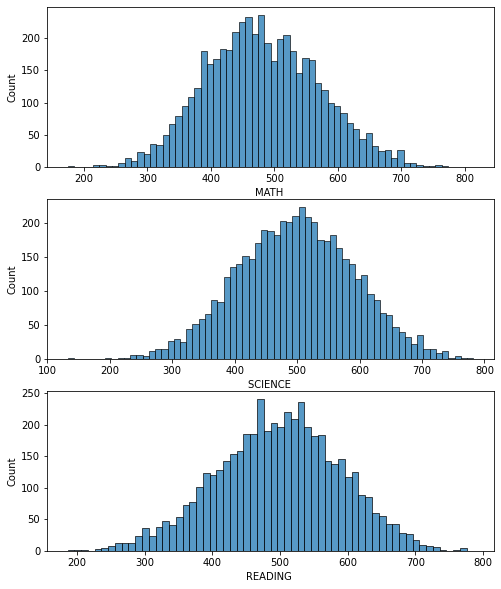

In [11]:
# Distribution of the GRADE MATH Science and Reading scores
sub_ls= ['PV1MATH','PV1SCIE','PV1READ']
sub_name = ['MATH','SCIENCE','READING']
fig, ax = plt.subplots(nrows=3, figsize = [8,10])

for  i in range(len(sub_ls)):
    sub = sub_ls[i]
    bins = np.arange(df_us[sub].min(), df_us[sub].max()+0.1,10)
    sb.histplot(data = df_us, x = sub, bins = bins,ax = ax[i])
    ax[i].set_xlabel('{} '.format(sub_name[i]))
    ax[i].set_ylabel('Count')

plt.show()

The Math Science and Reading performance follow normal distribution as expected beacuse the plausible values are not test scores but random numbers drawn from the distribution of scores that could be reasonably assigned to each individual.(*PISA 2012 Technical Report*, OEDC 2014).

## Out-of-school study time distribution

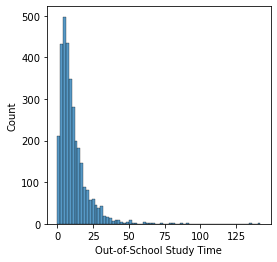

In [12]:
# Distribution of Out-of-School Study Time
plt.figure(figsize = (4,4))
nbin = np.arange(df_us['OUTHOURS'].min(), df_us['OUTHOURS'].max()+0.1,2)
sb.histplot(data = df_us, x = 'OUTHOURS',color = 'tab:blue', bins = nbin);
plt.xlabel('Out-of-School Study Time');

The out-of-school study time is right-skewed. The majority of students study less than 20 hours per week. 
Also, most of the data locate at the far left of the ax, and the max bin edge is more than 125 hours, but it is very unlikely for a student to study more than 70 hours per week outside of school,propably the student didn't fill the right answer to the quesitonairs, so I decided to investigate a bit more.

In [13]:
df_us.query('OUTHOURS > 70 | OUTHOURS < 0')

,CNT,SCHOOLID,STIDSTD,GENDER,IMMIG,FAMSTRUC,BFMJ2,BMMJ1,HISEI,FISCED,MISCED,HISCED,OUTHOURS,PARED,PV1MATH,PV1READ,PV1SCIE
476226,United States of America,24,674,Male,Native,1.0,NaN,41.27,41.27,NaN,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",86.0,12.0,459.0357,356.0454,329.2055
476921,United States of America,48,1369,Male,First-Generation,2.0,50.15,50.15,50.15,"ISCED 5A, 6","ISCED 5A, 6","ISCED 5A, 6",72.0,16.0,463.6314,516.4344,492.1112
477752,United States of America,74,2200,Male,NaN,NaN,NaN,NaN,NaN,"ISCED 5A, 6",ISCED 5B,"ISCED 5A, 6",142.0,16.0,367.9779,300.4706,351.4920
478452,United States of America,96,2900,Female,Second-Generation,2.0,NaN,82.41,82.41,NaN,"ISCED 5A, 6","ISCED 5A, 6",79.0,16.0,487.9343,492.4762,516.2626
479173,United States of America,117,3621,Male,Native,NaN,NaN,NaN,NaN,"ISCED 5A, 6",ISCED 5B,"ISCED 5A, 6",135.0,16.0,353.2560,314.5848,324.2633
479250,United States of America,120,3698,Female,First-Generation,2.0,17.55,24.53,24.53,ISCED 5B,"ISCED 3A, ISCED 4",ISCED 5B,90.0,14.0,557.9607,511.6985,598.6945
480475,United States of America,159,4923,Female,Second-Generation,2.0,31.15,30.90,31.15,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",80.0,12.0,534.5926,528.6173,532.2081


7 students have more than 70 hours per week out-of-school study time, but other fields look normal, so we can excluede their out-of-school study hour from the analysis.

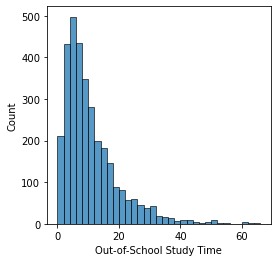

In [14]:
df_us.loc[df.OUTHOURS>70,'OUTHOURS'] = np.nan;
plt.figure(figsize = (4,4))
nbin = np.arange(0, df_us['OUTHOURS'].max()+0.1,2)
sb.histplot(data = df_us, x = 'OUTHOURS',color = 'tab:blue', bins = nbin);
plt.xlabel('Out-of-School Study Time');

## Parents occupation status

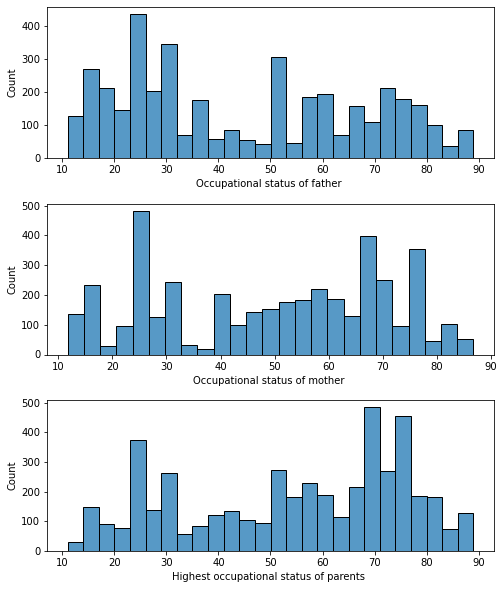

In [15]:
# Distribution of the GRADE MATH Science and Reading scores
sub_ls= ['BFMJ2', 'BMMJ1','HISEI']
sub_name = ['Occupational status of father','Occupational status of mother','Highest occupational status of parents']

fig, ax = plt.subplots(nrows=3, figsize = [8,10])
plt.subplots_adjust(hspace =0.3)
for  i in range(len(sub_ls)):
    sub = sub_ls[i]
    bins = np.arange(df_us[sub].min(), df_us[sub].max()+0.1,3)
    sb.histplot(data = df_us, x = sub, bins = bins,ax = ax[i])
    ax[i].set_xlabel('{} '.format(sub_name[i]))
    ax[i].set_ylabel('Count')

plt.show()

The occupational status of the parents is spreading out over the whole ranges with some peaks around 25, 30 and 50 for the fathers and 25, 67 and 75 for mothers. 

## Gender Distribution

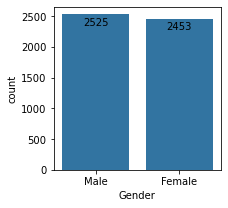

In [16]:
def autolabel_v(ax,rects):
    '''
    Annotate the value of each bar in a verticle bar plot.

            Parameters:
                    ax (matplotlib Axes): Axes object to draw the barplot onto
                    rects (matplotlib.patches.Rectangle): The bars of the barplot to annotate on
            return: 

    '''
    for rect in rects:
        width = rect.get_width()
        ax.annotate(format(rect.get_height(), '.0f'),(rect.get_x()+0.5*width, rect.get_height()),
                     ha='center', va='center', xytext=(0, -8),textcoords='offset points')

# Distribution of Gender 
plt.figure(figsize=(3,3))
ax=sb.countplot(x='GENDER', data=df_us, order = ['Male', 'Female'],color ='tab:blue');
rect1=ax.patches;
plt.xlabel('Gender');        
autolabel_v(ax,rect1)

The number of male is nearly equal to the number of female students.

## Distribution of immigration background

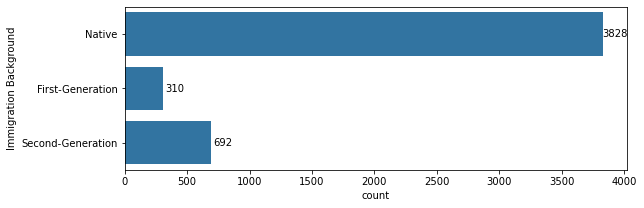

In [17]:
# Distribution of IMMIG
plt.figure(figsize=(9,3))
ax=sb.countplot(y='IMMIG', data=df_us, orient ='h',order = ['Native', 'First-Generation','Second-Generation'],color ='tab:blue');
plt.ylabel('Immigration Background');
rects = ax.patches;
def autolabel_h(ax,rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(format(width, '.0f'),(width, rect.get_y()+0.5*rect.get_height()),
                     ha='center', va='center', xytext=(12, 0),textcoords='offset points')
        
autolabel_h(ax,rects)

The majority of the participants are native, about 700 students are second-generation and 300 students are first-generation. There are few students don't share their immigration background.

## Distribution of family structure

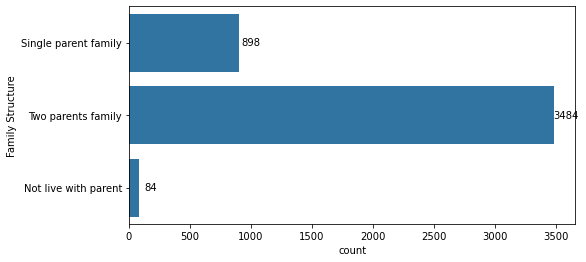

In [18]:
# Distribution of FAMSTRUC
plt.figure(figsize=(8,4))
ax=sb.countplot(y='FAMSTRUC', data=df_us, orient ='h',color ='tab:blue');
plt.ylabel('Family Structure');
plt.yticks([0,1,2],['Single parent family', 'Two parents family','Not live with parent']);
autolabel_h(ax,ax.patches);

Most of the students are from two-parents family, about 900 are from single-parents family, very few students are not living with their parents, and there are about 500 students didn't share their family structure information.

## 2. Distribution of father, mother and parents' highest education.

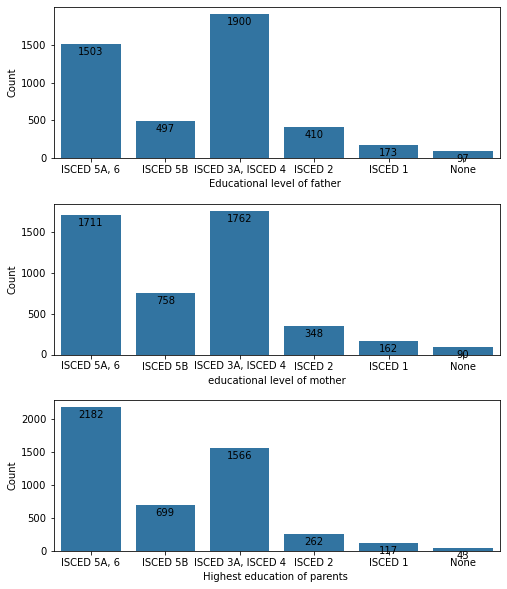

In [19]:
# Distribution of IMMIG, FAMSTRUC, HISCED
var_ls = ['FISCED','MISCED', 'HISCED']
var_name = ['Educational level of father', ' educational level of mother', 'Highest education of parents']
order_ed = ['ISCED 5A, 6','ISCED 5B','ISCED 3A, ISCED 4','ISCED 2','ISCED 1','None']
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
plt.subplots_adjust(hspace =0.3)
for  i in range(len(var_ls)):
    var = var_ls[i]
    sb.countplot(x=var, data=df_us,ax = ax[i], order =order_ed, color ='tab:blue')
    ax[i].set_xlabel('{} '.format(var_name[i]))
    ax[i].set_ylabel('Count')
    autolabel_v(ax[i],ax[i].patches)    
plt.show()

- Most of mothers or fathers have ISCED 3A (general upper secondary) and/or ISCED 4 (non-tertiary post-secondary) level of education. 
- The number of fathers with ISCED 1, ISCED2 and ISCED 3A, ISCED 4 is similar to the number of mothers who receive the same level of education.
- The number of mothers with ISCED 5A,6, ISCED 5B is slightly more than the number of fthers who receive the same level of education.
- There are more missing values of the father's education level than mother.

## Highest parental education in years

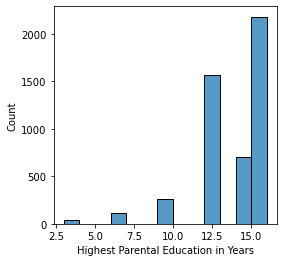

In [20]:
plt.figure(figsize = (4,4))
nbin = np.arange(df_us['PARED'].min(), df_us['PARED'].max()+0.1,1)
sb.histplot(data = df_us, x = 'PARED',color = 'tab:blue', bins = nbin);
plt.xlabel('Highest Parental Education in Years');

The highest parental education in years are discrete numbers, so maybe using countplot is more appropriate.

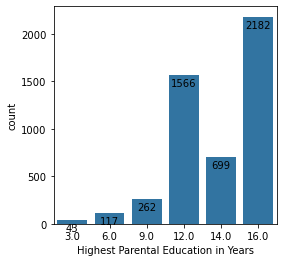

In [21]:
plt.figure(figsize = (4,4))
ax= sb.countplot(data = df_us, x = 'PARED',color = 'tab:blue');
plt.xlabel('Highest Parental Education in Years');
rects = ax.patches;
autolabel_v(ax,rects)

The distribution of highest parental education in years is basically the same as the highest parental education, however there are 43 missing data in the highest parental education and their education in years is set to 3, I think this is not very accurate and should be also marked as missing value.

In [22]:
df_us.query('HISCED == "None"')

,CNT,SCHOOLID,STIDSTD,GENDER,IMMIG,FAMSTRUC,BFMJ2,BMMJ1,HISEI,FISCED,MISCED,HISCED,OUTHOURS,PARED,PV1MATH,PV1READ,PV1SCIE
475605,United States of America,2,53,Female,Second-Generation,2.0,15.35,16.50,16.50,None,None,None,NaN,3.0,461.3725,483.3417,427.7695
475670,United States of America,4,118,Male,First-Generation,NaN,NaN,39.04,39.04,None,None,None,NaN,3.0,345.7003,384.9154,360.0709
475693,United States of America,5,141,Male,Second-Generation,2.0,21.82,24.98,24.98,None,None,None,8.0,3.0,387.2176,424.4513,386.7400
476043,United States of America,18,491,Male,Second-Generation,1.0,NaN,24.53,24.53,None,None,None,0.0,3.0,389.5544,420.4415,402.5923
476062,United States of America,18,510,Male,Second-Generation,2.0,NaN,NaN,NaN,None,None,None,NaN,3.0,392.6702,388.3637,337.3182
476109,United States of America,20,557,Female,Second-Generation,2.0,25.95,16.50,25.95,None,None,None,10.0,3.0,301.6124,365.5455,358.5789
476262,United States of America,26,710,Female,Second-Generation,2.0,11.74,16.38,16.38,None,None,None,4.0,3.0,426.3982,453.4756,446.6057
476267,United States of America,26,715,Female,Second-Generation,2.0,11.74,14.21,14.21,None,None,None,3.0,3.0,309.1681,377.3807,368.0903
476298,United States of America,27,746,Male,Second-Generation,2.0,40.54,17.55,40.54,None,None,None,6.0,3.0,557.9607,552.5219,553.3756
476491,United States of America,33,939,Female,Second-Generation,2.0,11.74,20.91,20.91,None,None,None,6.0,3.0,490.8942,533.1449,515.2369


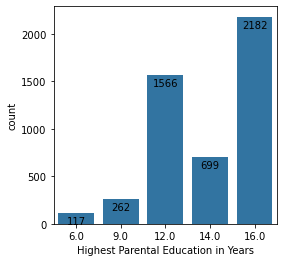

In [23]:
df_us.loc[df.PARED==3,'PARED'] = np.nan;
plt.figure(figsize = (4,4))
ax= sb.countplot(data = df_us, x = 'PARED',color = 'tab:blue');
plt.xlabel('Highest Parental Education in Years');
rects = ax.patches;
autolabel_v(ax,rects)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> When plot the out-of-school study hour histogram, I found some out-of-school study hour more than 70 hour per week, which is very unlikely. To ensure the data quality, I set all the out-of-school study hour which is more than 70 hours to be NAN.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the highest education of parents in years, we found the PARED with missing education level is set to 3 years which is not correct, because in this case one doesn't know how many years of education the student's parent have, so I changed it to NAN. 

## Bivariate Exploration
First I seperate the numberical and non-numerical columns, for the numberical columns, I will look at their relationship using the correlation heat map and pairplot.

In [24]:
num_col = ['BFMJ2', 'BMMJ1','HISEI','PARED','OUTHOURS','PV1MATH','PV1SCIE','PV1READ'];
cat_col = ['IMMIG','FAMSTRUC','FISCED','MISCED','HISCED']

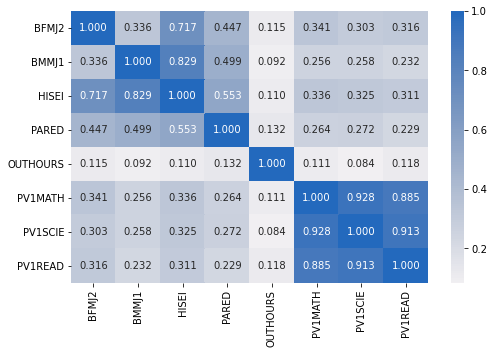

In [25]:
# Correlation heatmap of the numerical columns
plt.figure(figsize = [8, 5])
sb.heatmap(df_us[num_col].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

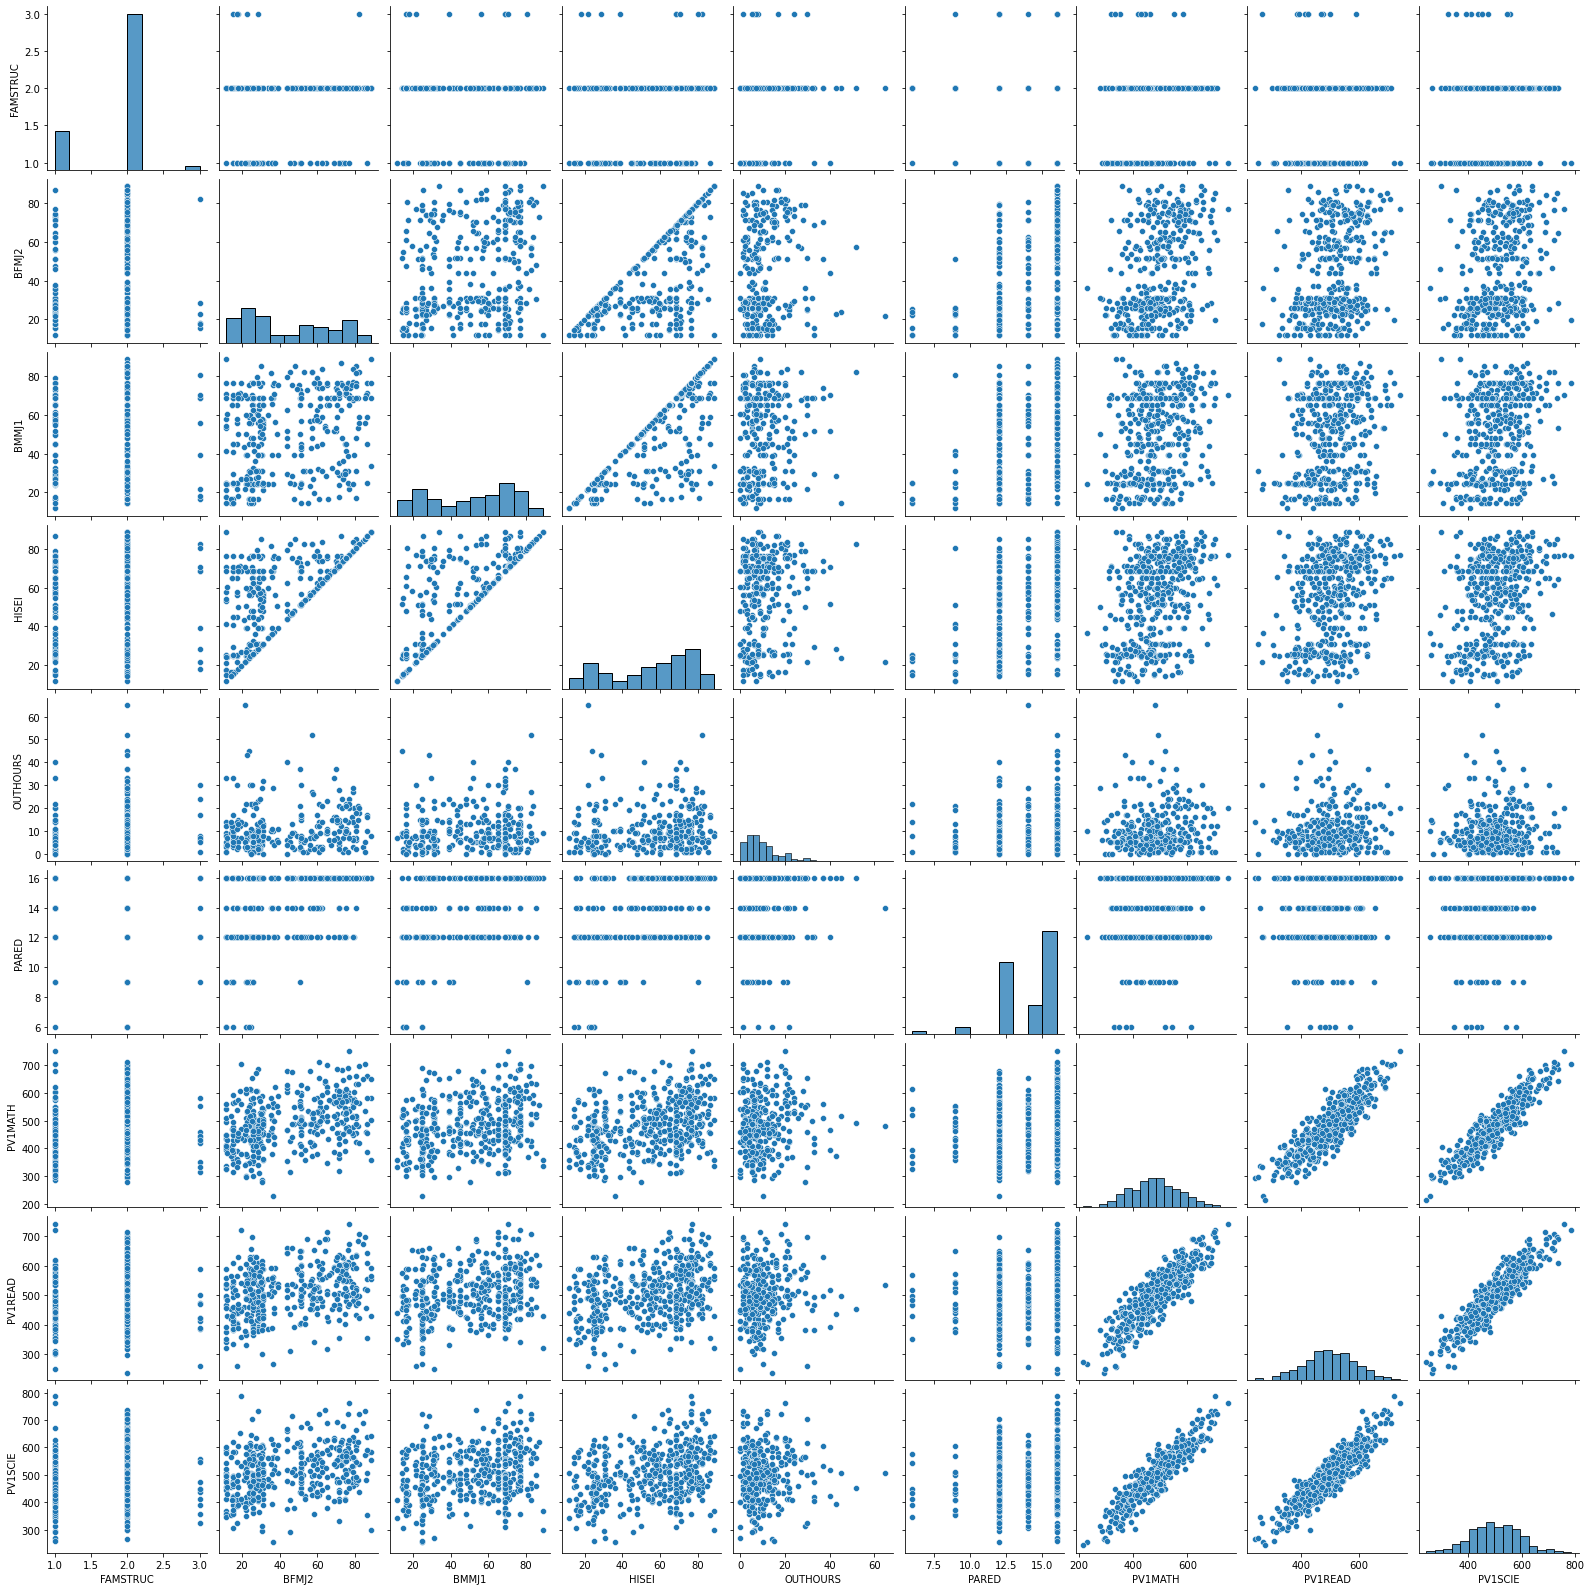

In [26]:
# pairplot matrix: sample 500 students so that plots are clearer and
# they render faster
df_samp = df_us.sample(500, replace=False, random_state=1)
g = sb.pairplot(data = df_samp)

- The students' math, reading and science performance are highly correlated as expected, as usually the students who is good at one subject also perform well in other subjects. 
- The parents' occupational status and parents education year have weak positive correlation with the student's academic performance, which indicates that the parents with higher education and occupation may contribute to better students' academic performace but it is not a prevailing factor.

In [27]:
# make the math science and reading score to one column
df_us2 = df_us.melt(id_vars=['SCHOOLID', 'STIDSTD','GENDER','IMMIG','FAMSTRUC',
                             'BFMJ2', 'BMMJ1','HISEI', 'FISCED','MISCED','HISCED',
                             'OUTHOURS','PARED'], value_vars=['PV1MATH','PV1SCIE','PV1READ'],var_name='Subject',value_name='Score')

## Out-of-school study hours vs. students' academic performace
Question: Do students with longer out-of-school study hour have better academic performance?

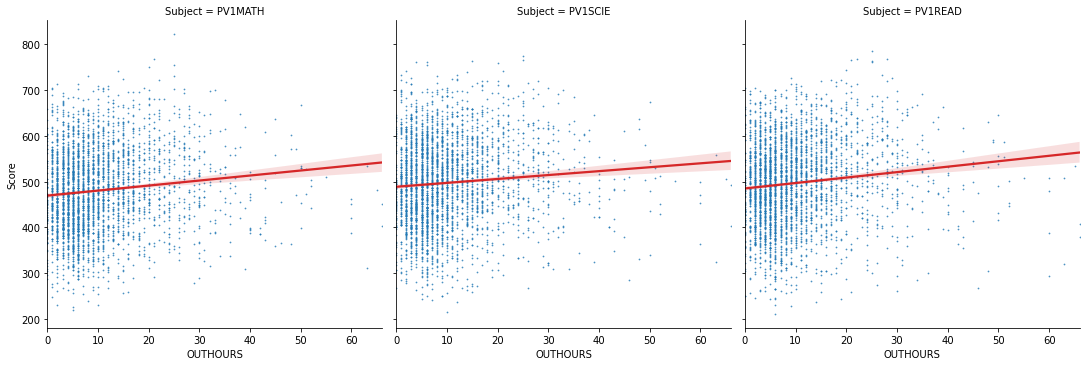

In [38]:
sb.lmplot(x='OUTHOURS', y="Score", col = 'Subject', scatter_kws={"marker":'.',"linewidth":0,"s":3},line_kws={"color":'tab:red'},
                data=df_us2, sharey = True);

Interestingly, the students' academic performance do not have strong correlation with out-of-school study hours.

## Highest occupational status of parents vs. students academic performace 

Question: Does parents' occupational status affects students' academic performance?

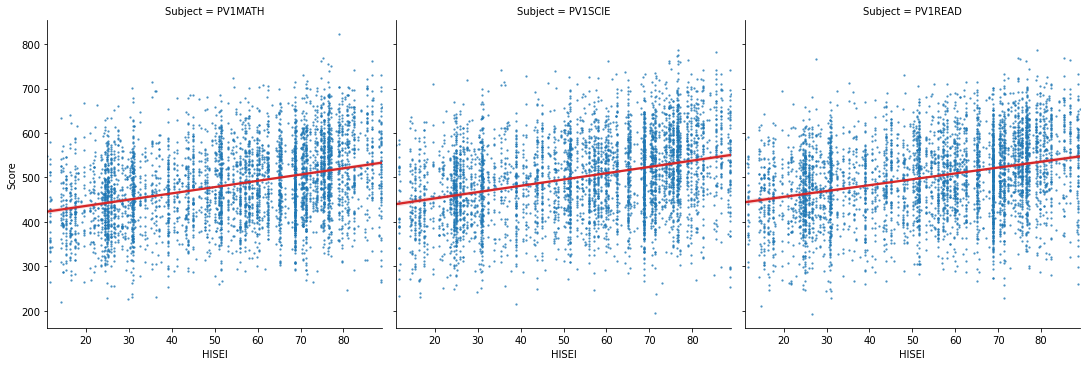

In [37]:
# regression plot of occupational status and students's score
sb.lmplot(x='HISEI', y="Score", col = 'Subject', scatter_kws={"linewidth":0,"s":5},line_kws={"color":'tab:red'},
                data=df_us2, sharey = True);

The students' academic performances are positive correlated with the highest occupational status of the parents, but the variance of the math performance for each HISEI value is very large.

## MATH, SCIENCE and READING score of different genders
Question: How does student academic performance changes with the gender?

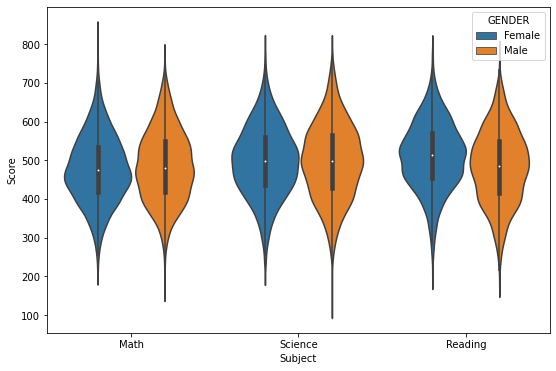

In [39]:
# Violin plot of the academic performance in math, science and reading for different genders
plt.figure(figsize = [9, 6])
ax = sb.violinplot(x="Subject", y="Score", hue='GENDER', data=df_us2, inner = 'box');
ax.set_xticklabels(['Math','Science','Reading']);

- Male and female students show similar academic performance in math and science.
- The female students have sligtly higher median score in Reading than the male student.
- The female students have slightly longer tail towards the higher score in math than the male students.
- The male students have slightly longer tail towards the lower score in Science than the female students.

## MATH, SCIENCE and READING score of different immigration backgrounds
Question: How does student academic performance changes with the immigration background?

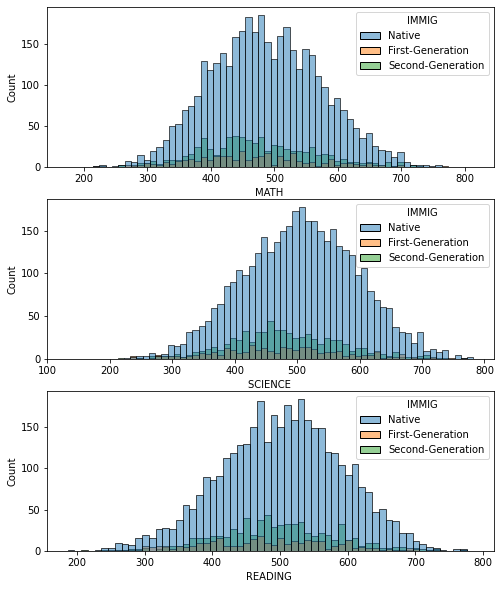

In [40]:
# Distribution of the GRADE MATH Science and Reading scores
sub_ls= ['PV1MATH','PV1SCIE','PV1READ']
sub_name = ['MATH','SCIENCE','READING']
fig, ax = plt.subplots(nrows=3, figsize = [8,10])

for  i in range(len(sub_ls)):
    sub = sub_ls[i]
    bins = np.arange(df_us[sub].min(), df_us[sub].max()+0.1,10)
    sb.histplot(data = df_us, x = sub, bins = bins,ax = ax[i], hue = 'IMMIG')
    ax[i].set_xlabel('{} '.format(sub_name[i]))
    ax[i].set_ylabel('Count')

plt.show()

It is hard to compare the academic performance distribution across different immigration background using the normal histgram as the number of native students are much more than the first-genderation and second-generations students. We can resample each group with the same number of students and then look at the box plot instead.

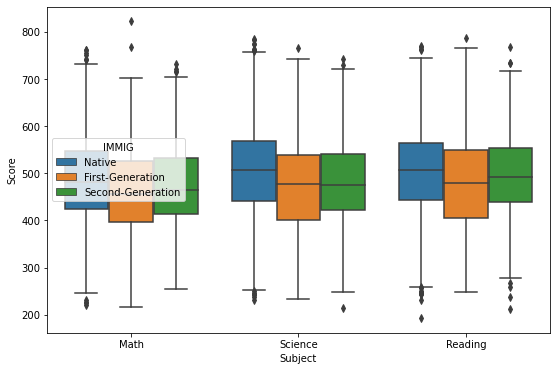

In [41]:
# box plot of the academic performance in math, science and reading for different immigration backgrounds
plt.figure(figsize = [9, 6])
ax = sb.boxplot(x="Subject", y="Score", hue='IMMIG', data=df_us2);
ax.set_xticklabels(['Math','Science','Reading']);

The students with different immigration background, their academic performance are not very different from each other, except that the native students seem to slightly better than students who are first or second generation. But statistical test is required to rigidly test if they are significantly different or not.
## MATH, SCIENCE and READING score of different family structure
Q:How does student academic performance changes with the family strucure?

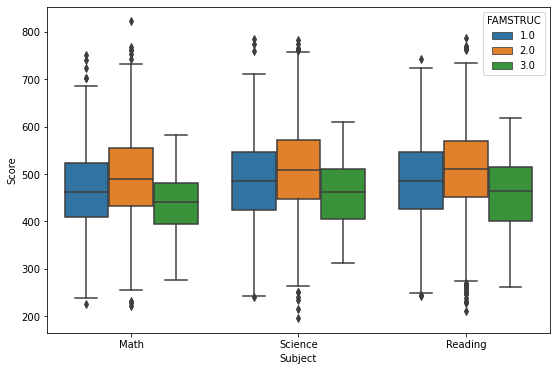

In [42]:
# boxplot of the academic performance in math, science and reading for different family structure

plt.figure(figsize = [9, 6])
ax = sb.boxplot(x="Subject", y="Score", hue='FAMSTRUC', data=df_us2);
ax.set_xticklabels(['Math','Science','Reading']);

The students living in the two parents family generally have better academic performance than students from single family than the students who do not live with their parents.
## MATH, SCIENCE and READING scores with different parental education background
Q: How does student academic performance changes with the parents education background?

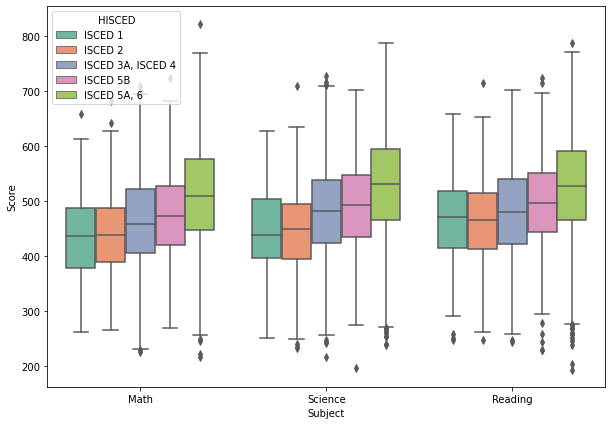

In [43]:
# Boxplot of the academic performance in math, science and reading for different highest parental education
plt.figure(figsize = [10, 7])
ax = sb.boxplot(x="Subject", y="Score", hue='HISCED', data=df_us2.query('HISCED not in "None"'),
                hue_order =['ISCED 1','ISCED 2','ISCED 3A, ISCED 4','ISCED 5B', 'ISCED 5A, 6'],palette="Set2");
ax.set_xticklabels(['Math','Science','Reading']);

In general, the students whose parents have higher education tends to have better academic performance in all three subjects.

## Highest parents' education vs. out-of-school study hour
Q: Does student study longer out of school when their parents have higher education?

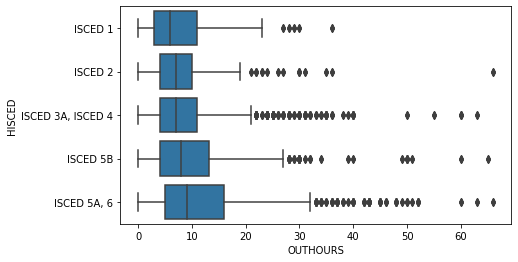

In [44]:
plt.figure(figsize = [7, 4])
sb.boxplot(y="HISCED", x="OUTHOURS", data=df_us2.query('HISCED not in "None"'),orient = 'h',
           order =['ISCED 1','ISCED 2','ISCED 3A, ISCED 4','ISCED 5B', 'ISCED 5A, 6'],color = 'tab:blue');
#plt.ylim([0,20]);

## Highest parents' education vs. highest occupation status of parents
Q: Does the parents with higher education correspond to better occupation?

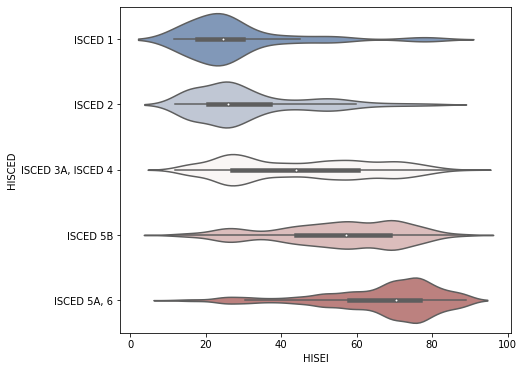

In [45]:
# regression plot of occupational status and students's score
plt.figure(figsize = [7, 6])
sb.violinplot(y='HISCED', x="HISEI", data=df_us2.query('HISCED not in "None"'), orient = 'h',
           order =['ISCED 1','ISCED 2','ISCED 3A, ISCED 4','ISCED 5B', 'ISCED 5A, 6'],palette="vlag");


As expected, the parents with higher education level tend to have higher occupational status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The student's math science and reading performace have strong positive correlation with each other. And students tend to have better academic performance when their parents received higher education and have higher occupational status. On the other hand, their academic performances are not affected by the out-of-school study hour, gender or immigration status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The students tend to study longer out of school when their parents have higher education, and the parents with higher education level tend to have higher occupational status.

## Multivariate Exploration


In this part, I want to look at how the gender, immigration background, family structure and education level of the parents affect the relationship of students' academic performance and highest occupational status of the parents.  

## Highest occupational status of parents vs. students academic performance of different gender

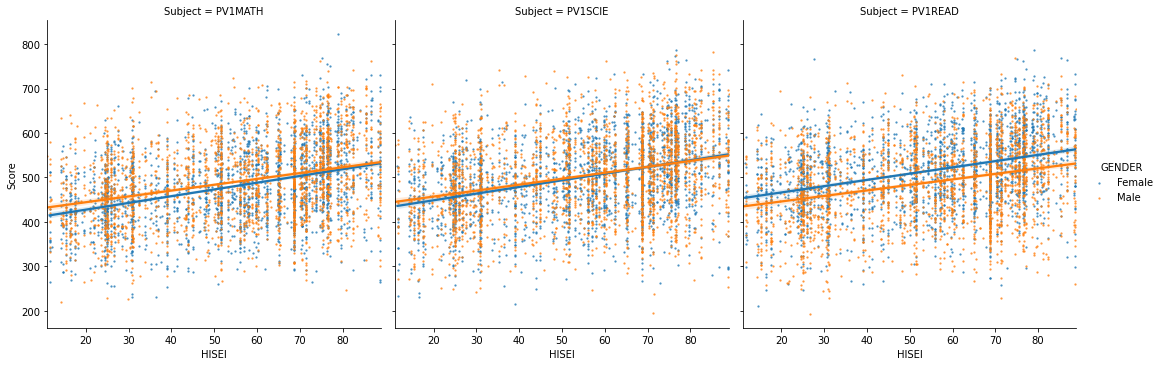

In [47]:
# regression plot of occupational status and students's score
g= sb.lmplot(x='HISEI', y="Score", col = 'Subject',hue = 'GENDER',scatter_kws={"linewidth":0,"s":5},
                data=df_us2, sharey = True);

Again, the student's gender doesn't have much influence on the relationship between students' academic performance and highest occupational status of the parents. 

## Highest occupational status of parents vs. students academic performance of different immigration status

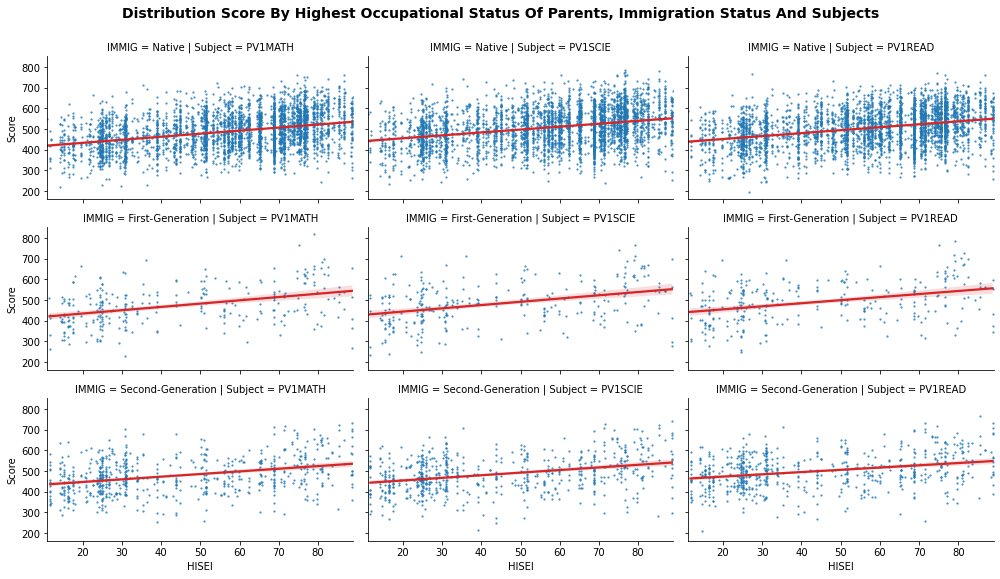

In [56]:
# regression plot of occupational status and students's score
g= sb.lmplot(x='HISEI', y="Score", col = 'Subject',row= 'IMMIG', scatter_kws={"linewidth":0,"s":5},line_kws={"color":'tab:red'},
                data=df_us2, sharey = True);
# Main title
plt.suptitle("Distribution score by Highest occupational status of parents, immigration status and subjects".title(), y =1
             ,fontsize = 14, weight ='bold');
# Set plot dimentions - figure level
g.fig.set_size_inches(14,8);
# optimize distance between subplots
plt.tight_layout();


Overall, the immigration status doesn't have that much effect on the relationship between students' academic performance and highest occupational status of the parents. However, from the scatter plot, we can see that many students who are first- or second-generation, their parents' highest occupation status is around 25, while many students who are native, their parents' highest occupational status are around 70-80.

## Highest occupational status of parents vs. students academic performance of different family structure

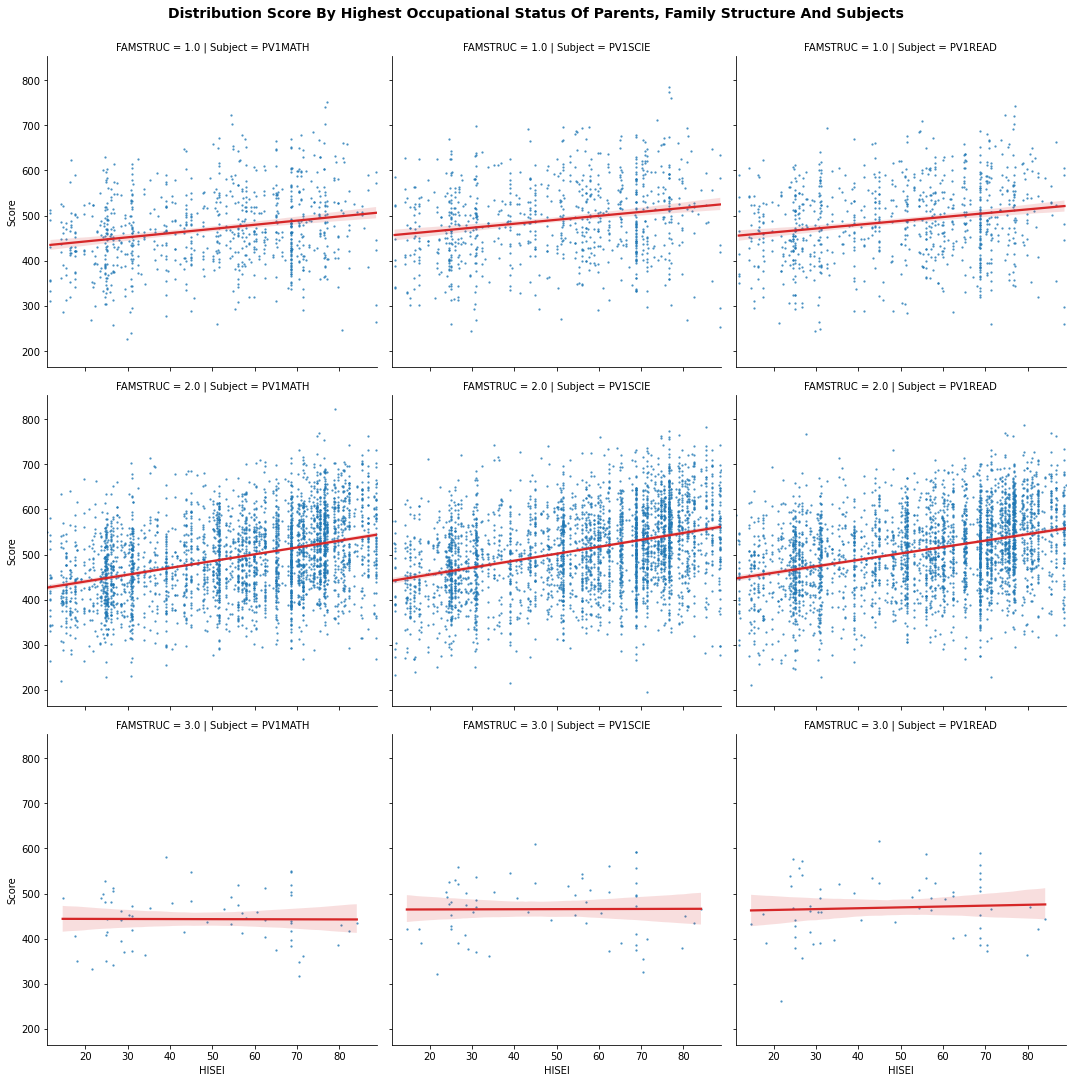

In [57]:
# regression plot of occupational status and students's score
sb.lmplot(x='HISEI', y="Score", col = 'Subject',row= 'FAMSTRUC', scatter_kws={"linewidth":0,"s":5},line_kws={"color":'tab:red'},
                data=df_us2, sharey = True);
# Main title
plt.suptitle("Distribution score by Highest occupational status of parents, family structure and subjects".title(), y =1
             ,fontsize = 14, weight ='bold');
# Set plot dimentions - figure level
g.fig.set_size_inches(14,8);
# optimize distance between subplots
plt.tight_layout();


Not suprisingly, the students who do not live together with their parents, the regression line of the highest occupational status of parents vs. students academic performance is almost flat. The slop of the regression line for the two parents family is larger than the regression slope of the single-parents family.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I investigated the influence of gender, immigration status, family struture to the relationship between students' academic performance and the highest parental occupational status. In general, the higher occupation status associate with better student academic performance. The gender doesn't affect the so much the relationship. The family structure does affect this relationship. In the two-parents family, the regression slope is largest, then is the single-parent family. The students who don't live with their parents, their academic performance doesn't correlate with the parents occupational status.

### Were there any interesting or surprising interactions between features?

> The immigration status doesn't affect the regression between parental occupational status and the students' academic performance, but we can see that the highest parents occupational status of first- and second generation students are more concentrated on the lower value around 25, while the occupational status of the parents of the native students are concentrated on the higher value around 70.

## Conclusions

In this project, I analysed the OECD’s Programme for International Student Assessment 2012 survey dataset (PISA2012). The survey assessed the 15-year-old students' skills and knowledge in mathematics, science and reading. The original PISA2012 dataset has 485,490 rows and 636 columns, which includes the students basic information, like the country, which school they attend, gender, age and so forth, their answers to the questionairs, the integrated results of different measures infered from the answers of the questionairs, five plausible values of the student performance in the mathematica, science and reading, weights and dataentry date etc. 

Since I am mainly interested in how the immigration status and family environment contribute to the students' math, reading and science performance in the United States, I selected the features including the student's gender, immigrant background, family Structure, occupational status of parents, educational level of parents, out-of-School Study Time, plausible value 1 in mathematics science and reading for my analysis. 

First, I did some data pre-wrangling to fix the datatypes and column names and select only the student of United States. Then, I applied univariant exploration on my dataset to look at the distribution of each feature. Next, I investigate the bivarient relationships between the features, I found that the student's math science and reading scores have strong positive correlation with each other and the parents occupational status and educational level are also positively correlated with the students academic performance. Finally, I looked at how the gender, family strucure, immigration status can affect the relationship between students' academic performance and parents occupational status. It has been shown that the gender doesn't affect the so much the relationship. The family structure does affect this relationship. In the two-parents family, the regression slope is largest, then is the single-parent family. The students who don't live with their parents, their academic performance doesn't correlate with the parents occupational status.
